## Installing Dependencies

In [1]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/d1/93

In [2]:
!pip install pandas matplotlib sklearn

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/9e/71/756a1be6bee0209d8c0d8c5e3b9fc72c00373f384a4017095ec404aec3ad/pandas-2.0.3-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.0.3-cp311-cp311-win_amd64.whl.metadata (18 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/4d/9c/65830d4a56c47f5283eaa244dc1228c5da9c844a9f999ebcc2e69bf6cc65/matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/16/09/989b982322439faa4bafffcd669e6f942b38fee897c2664c987bcd091dec/contourpy-1.1.0-cp311-cp311-win_amd64.whl.metadata
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining depen

In [3]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

## Loading the data

In [4]:
file_path = os.path.join('tcm-dataset','train.csv')

In [5]:
df = pd.read_csv(file_path)

In [6]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df['comment_text'][4]

"You, sir, are my hero. Any chance you remember what page that's on?"

In [8]:
df[df.columns[2:]].iloc[4]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 4, dtype: int64

## Preprocessing

In [9]:
from tensorflow.keras.layers import TextVectorization

In [10]:
#Splitting the dataset into features and labels
X = df['comment_text']
y = df[df.columns[2:]].values

In [11]:
#Number of words in the vocab
MAX_WORDS = 200000 

In [12]:
#Tokenization
vectorizer = TextVectorization(max_tokens=MAX_WORDS,
                               output_sequence_length=1800,   #Max len of sentence
                               output_mode='int')

In [13]:
vectorizer.adapt(X.values)

In [14]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [15]:
vectorized_text = vectorizer(X.values)

In [16]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [17]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [18]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [19]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [20]:
train_generator = train.as_numpy_iterator()

In [21]:
train_generator.next()

(array([[2994,  312,    8, ...,    0,    0,    0],
        [1339, 1339, 1410, ...,    0,    0,    0],
        [ 729, 1299, 1394, ...,    0,    0,    0],
        ...,
        [1062,  844,  179, ...,    0,    0,    0],
        [  46,  185, 1934, ...,    0,    0,    0],
        [   8, 1994,    8, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

## Creating Sequential Model

In [26]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM,Bidirectional,Dense,Embedding

In [27]:
model = Sequential()
#Embedding Layer
model.add(Embedding(MAX_WORDS+1,32))
#Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
#Feature extractor layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
#Final Layer
model.add(Dense(6, activation='sigmoid'))

In [28]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [30]:
history = model.fit(train, epochs=3, validation_data=val)

Epoch 1/3
6981/6981 [==============================] - 4839s 693ms/step - loss: 0.0621 - val_loss: 0.0459
Epoch 2/3
6981/6981 [==============================] - 4771s 683ms/step - loss: 0.0465 - val_loss: 0.0430
Epoch 3/3
6981/6981 [==============================] - 4773s 684ms/step - loss: 0.0405 - val_loss: 0.0358


In [31]:
history.history

{'loss': [0.06206353381276131, 0.046518582850694656, 0.040542781352996826],
 'val_loss': [0.04588906839489937, 0.04299760237336159, 0.03584704548120499]}

<Figure size 1000x800 with 0 Axes>

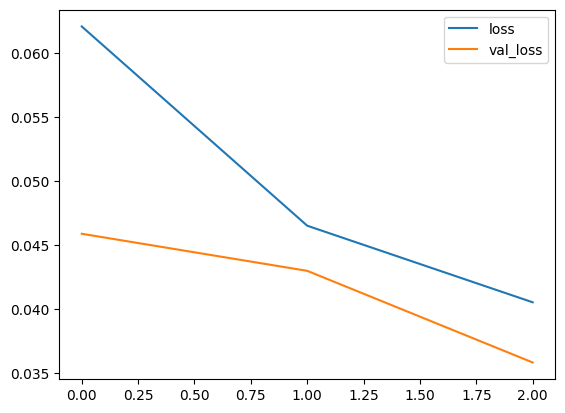

In [32]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
pd.DataFrame(history.history).plot()
plt.show()

## Making Predictions

In [33]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [34]:
model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 1s 690ms/step


array([[0.98930246, 0.21267766, 0.9022207 , 0.0382361 , 0.78613603,
        0.16322719]], dtype=float32)

In [35]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [36]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 0s 65ms/step


In [37]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [40]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 230ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [62]:
import json

In [63]:
# Save the vectorizer separately
vectorizer_config = vectorizer.get_config()
with open('toxic_comment_vectorizer.json', 'w') as f:
    json.dump(vectorizer_config, f)

## Evaluating Model

In [41]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [42]:
pre = Precision()
rec = Recall()
acc = CategoricalAccuracy()

In [43]:
for batch in test.as_numpy_iterator():
    #Unpack the batch
    X_true, y_true = batch
    
    #Making a prediction
    y_hat = model.predict(X_true)
    
    #Flattening the predictions
    y_true = y_true.flatten()
    y_hat = y_hat.flatten()
    
    pre.update_state(y_true, y_hat)
    rec.update_state(y_true, y_hat)
    acc.update_state(y_true, y_hat)

1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 102ms/step


In [44]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.8429936170578003, Recall: 0.7648078799247742, Accuracy: 0.4854563772678375


## Displaying output

In [59]:
model.save('toxic-model')

INFO:tensorflow:Assets written to: toxic-model\assets


INFO:tensorflow:Assets written to: toxic-model\assets


In [56]:
!pip install typing_extensions==4.5.0

In [55]:
!pip install pydantic==2.1.1

     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
     --------- --------------------------- 30.7/126.0 kB 660.6 kB/s eta 0:00:01
     --------- --------------------------- 30.7/126.0 kB 660.6 kB/s eta 0:00:01
     ------------------ ------------------ 61.4/126.0 kB 297.7 kB/s eta 0:00:01
     -------------------------------- --- 112.6/126.0 kB 467.6 kB/s eta 0:00:01
     ------------------------------------ 126.0/126.0 kB 528.7 kB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.1.1:
      Successfully uninstalled pydantic-2.1.1


In [47]:
!pip install ipywidgets

  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/a3/af/9d5f256025100b578b11d7280e76fda349255666f752b618a613785cb58d/ipywidgets-8.0.7-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.7 from https://files.pythonhosted.org/packages/8e/d4/d31b12ac0b87e8cc9fdb6ea1eb6596de405eaaa2f25606aaa755d0eebbc0/widgetsnbextension-4.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets~=3.0.7 from https://files.pythonhosted.org/packages/74/5e/2475ac62faf2e342b2bf20b8d8e375f49400ecb38f52e4e0a7557eb1cedb/jupyterlab_widgets-3.0.8-py3-none-any.whl.metadata
Using cached ipywidgets-8.0.7-py3-none-any.whl (138 kB)
Using cached jupyterlab_widgets-3.0.8-py3-none-any.whl (214 kB)
Using cached widgetsnbextension-4.0.8-py3-none-any.whl (2.3 MB)


In [65]:
import ipywidgets as widgets
from IPython.display import display

In [66]:
# Function to preprocess and vectorize the user input
def preprocess_input(input_text):
    vectorized_text = vectorizer([input_text])
    return vectorized_text

In [71]:
# Function to make prediction and display the result
def score_comment(comment):
    vectorized_comment = preprocess_input(comment)
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx] > 0.5)
        
    return text

In [72]:
# Create widgets
text_input = widgets.Textarea(description='Enter your comment here:')
predict_button = widgets.Button(description='Predict')
output_text = widgets.Output()

In [82]:
# Use interact to create a dynamic widget that updates the output
@widgets.interact(comment=text_input)
def on_predict_button_click(comment):
    if comment.strip():
        with output_text:
            output_text.clear_output()
            result_text = score_comment(comment)
            print(result_text)

# Display the widgets
display(output_text)

interactive(children=(Textarea(value='I will kill you\n\n\n', description='Enter your comment here:'), Output(…

Output(outputs=({'output_type': 'stream', 'text': '1/1 [==============================] - 0s 63ms/step\ntoxic:…